In [161]:
import pandas as pd

In [162]:
df = pd.read_csv('BMED_RAW_DATA_filtered.csv')
df

,exp,Voltage [V],Temp_F [C],Temp_A [C],Temp_B [C],Electrolyte [M],Ci_LA [M],Ci_K [M],Time [hr],CF_LA [M],...,pH_A,pH_B,VF_Tank [L],VA_Tank [L],VB_Tank [L],VF_Line [L],VA_Line [L],VB_Line [L],SEC [kWh/kg],Current [A]
0,0,30,20.9,20.7,21.2,0.25,0.5,1.0,0.000000,0.467925,...,10.720,11.540,0.80,0.8,0.80,0.20,0.2,0.20,0.000000,0.1
1,0,30,25.6,25.7,26.2,0.25,0.5,1.0,1.000000,0.434063,...,2.960,13.040,0.80,0.8,0.80,0.20,0.2,0.20,2.011212,1.0
2,0,30,29.5,29.3,29.9,0.25,0.5,1.0,2.000000,0.312599,...,2.360,13.450,0.80,0.8,0.80,0.20,0.2,0.20,1.311964,1.7
3,0,30,26.2,26.1,27.0,0.25,0.5,1.0,3.000000,-0.004546,...,2.170,13.580,0.80,0.8,0.80,0.20,0.2,0.20,0.909535,0.4
4,0,30,NaN,NaN,NaN,0.25,0.5,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.20,0.2,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,43,35,35.0,34.3,34.7,0.50,3.0,3.0,5.933333,0.258292,...,2.242,13.739,0.10,1.2,2.05,0.18,0.2,0.15,3.102596,3.5
326,43,35,29.8,29.0,29.6,0.50,3.0,3.0,6.933333,0.048301,...,2.255,13.991,0.05,1.2,2.10,0.18,0.2,0.15,3.098637,1.0
327,43,35,NaN,NaN,NaN,0.50,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,0.2,0.15,NaN,NaN
328,43,35,NaN,NaN,NaN,0.50,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,0.2,0.15,NaN,NaN


In [163]:
data = pd.DataFrame()
data['exp'] = df['exp']
data['V'] = df['Voltage [V]']
data['E'] = df['Electrolyte [M]']
data['Ci_LA'] = df['Ci_LA [M]']
data['Ci_K'] = df['Ci_K [M]']
data['t'] = df['Time [hr]']
data['VF'] = df['VF_Tank [L]'] + df['VF_Line [L]']
data['VA'] = df['VA_Tank [L]'] + df['VA_Line [L]']
data['VB'] = df['VB_Tank [L]'] + df['VB_Line [L]']
data['CF_LA'] = df['CF_LA [M]']
data['CF_K'] = df['CF_K [M]']
data['I'] = df['Current [A]']
data['CA_LA'] = df['CA_LA [M]']
data['CB_K'] = df['CB_K [M]']
data1 = data.dropna()

# exp 값을 0부터 순차적으로 재할당
exp_mapping = {old_exp: new_exp for new_exp, old_exp in enumerate(sorted(data1['exp'].unique()))}
data1['exp'] = data1['exp'].map(exp_mapping)
data1

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2342707629.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['exp'] = data1['exp'].map(exp_mapping)


,exp,V,E,Ci_LA,Ci_K,t,VF,VA,VB,CF_LA,CF_K,I,CA_LA,CB_K
0,0,30,0.25,0.5,1.0,0.000000,1.00,1.00,1.00,0.467925,1.068539,0.1,-0.005991,0.017298
1,0,30,0.25,0.5,1.0,1.000000,1.00,1.00,1.00,0.434063,0.469580,1.0,0.028369,0.723471
2,0,30,0.25,0.5,1.0,2.000000,1.00,1.00,1.00,0.312599,0.302430,1.7,0.161900,1.052120
3,0,30,0.25,0.5,1.0,3.000000,1.00,1.00,1.00,-0.004546,0.004571,0.4,0.415604,1.248425
10,1,20,0.25,0.5,1.0,0.000000,1.00,1.00,1.00,0.460377,1.035954,0.0,-0.006020,0.011474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,32,35,0.50,3.0,3.0,2.933333,1.03,1.00,1.93,2.470914,1.660887,4.2,0.577139,1.179806
323,32,35,0.50,3.0,3.0,3.933333,0.78,1.15,2.00,2.193242,1.109295,4.4,1.063021,1.734744
324,32,35,0.50,3.0,3.0,4.933333,0.58,1.28,2.10,1.570518,0.649633,4.4,1.593019,2.124536
325,32,35,0.50,3.0,3.0,5.933333,0.28,1.40,2.20,0.258292,0.096276,3.5,2.081178,2.372350


In [164]:
# 각 실험별 첫 행의 데이터를 저장할 리스트 초기화
VF_init = []
VA_init = []
VB_init = []
CF_LA_init = []
CF_K_init = []

# 각 실험별로 첫 행의 데이터 추출
for exp in data1['exp'].unique():
    exp_data = data1[data1['exp'] == exp].iloc[0]
    VF_init.append(exp_data['VF'])
    VA_init.append(exp_data['VA'])
    VB_init.append(exp_data['VB'])
    CF_LA_init.append(exp_data['CF_LA'])
    CF_K_init.append(exp_data['CF_K'])

# 결과 확인
print("VF 초기값:", VF_init)
print("VA 초기값:", VA_init)
print("VB 초기값:", VB_init)
print("CF_LA 초기값:", CF_LA_init)
print("CF_K 초기값:", CF_K_init)


# 각 실험별 초기값을 데이터프레임에 할당
data1['VF_init'] = data1['exp'].map(dict(zip(range(len(VF_init)), VF_init)))
data1['VA_init'] = data1['exp'].map(dict(zip(range(len(VA_init)), VA_init)))
data1['VB_init'] = data1['exp'].map(dict(zip(range(len(VB_init)), VB_init)))
data1['CF_LA_init'] = data1['exp'].map(dict(zip(range(len(CF_LA_init)), CF_LA_init)))
data1['CF_K_init'] = data1['exp'].map(dict(zip(range(len(CF_K_init)), CF_K_init)))
data1['TV_init'] = data1['VF_init'] + data1['VA_init'] + data1['VB_init']
data1['TV'] = data1['VF'] + data1['VA'] + data1['VB']
data1['pV'] = data1['TV_init']/data1['TV']
data1['pLA'] = data1['CF_LA_init'] - data1['Ci_LA']
data1['pK'] = data1['CF_K_init'] - data1['Ci_K']
data1['VFt'] = data1['VF']*data1['pV']
data1['VAt'] = data1['VA']*data1['pV']
data1['VBt'] = data1['VB']*data1['pV']
data1['CF_LAt'] = (data1['CF_LA'] - data1['pLA']).clip(lower=0)
data1['CF_Kt'] = (data1['CF_K'] - data1['pK']).clip(lower=0)
data1['tVt'] = data1['VFt'] + data1['VAt'] + data1['VBt']
data1['Ni_LA'] = data1['Ci_LA']*data1['VF_init']
data1['Ni_K'] = data1['Ci_K']*data1['VF_init']
data1['NF_LA'] = data1['CF_LAt']*data1['VFt']
data1['NA_LA'] = data1['Ni_LA'] - data1['NF_LA']
data1['NF_K'] = data1['CF_Kt']*data1['VFt']
data1['NB_K'] = data1['Ni_K'] - data1['NF_K']
data1['CF_LAf'] = data1['NF_LA']/data1['VFt']
data1['CA_LAf'] = data1['NA_LA']/data1['VAt']
data1['CF_Kf'] = data1['NF_K']/data1['VFt']
data1['CB_Kf'] = data1['NB_K']/data1['VBt']
data1['CF_LAe'] = data['CF_LA']
data1['CA_LAe'] = data['CA_LA']
data1['CF_Ke'] = data['CF_K']
data1['CB_Ke'] = data['CB_K']
data1.to_csv('test.csv')


VF 초기값: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9999999999999999), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
VA 초기값: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\3896578247.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['VF_init'] = data1['exp'].map(dict(zip(range(len(VF_init)), VF_init)))
C:\Users\USER\AppData\Local\Temp\ipykernel_21840\3896578247.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['VA_init'] = data1['exp'].map(dict(zip(range(len(VA_init)), VA_init)))
C:\Users\USER\AppData\Local\Temp\ipykernel_21840\3896578247.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [165]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

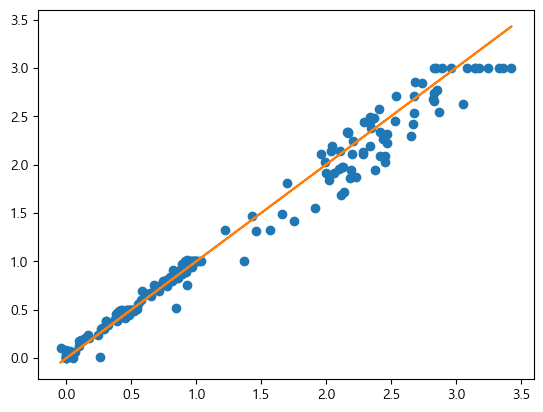

In [166]:
plt.plot(data1['CF_LAe'],data1['CF_LAf'],'o')
plt.plot(data1['CF_LAe'],data1['CF_LAe'],'-')
plt.show()


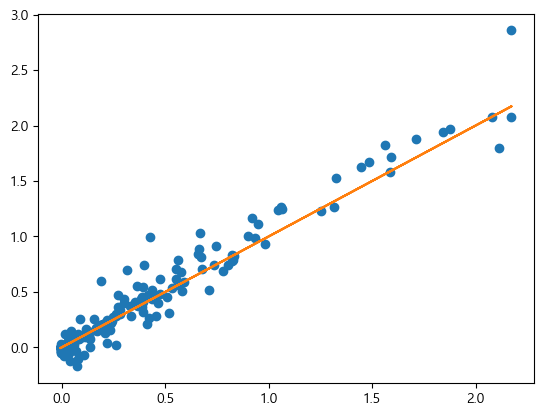

In [167]:
plt.plot(data1['CA_LAe'],data1['CA_LAf'],'o')
plt.plot(data1['CA_LAe'],data1['CA_LAe'],'-')
plt.show()

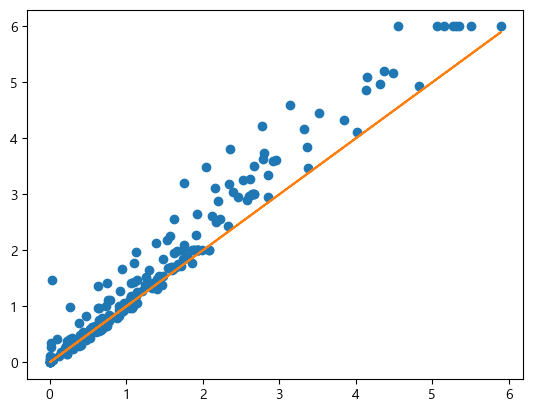

In [169]:
plt.plot(data1['CF_Ke'],data1['CF_Kf'],'o')
plt.plot(data1['CF_Ke'],data1['CF_Ke'],'-')
plt.show()

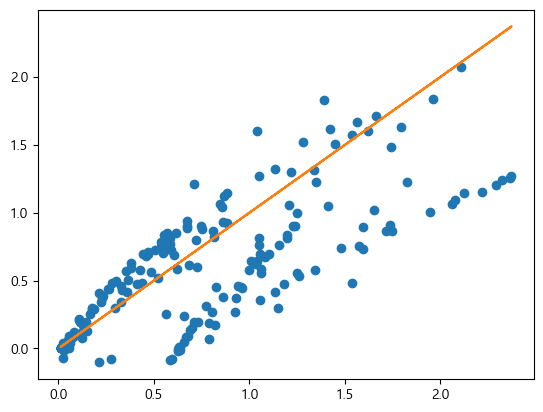

In [170]:
plt.plot(data1['CB_Ke'],data1['CB_Kf'],'o')
plt.plot(data1['CB_Ke'],data1['CB_Ke'],'-')
plt.show()

In [171]:
data1

,exp,V,E,Ci_LA,Ci_K,t,VF,VA,VB,CF_LA,...,NF_K,NB_K,CF_LAf,CA_LAf,CF_Kf,CB_Kf,CF_LAe,CA_LAe,CF_Ke,CB_Ke
0,0,30,0.25,0.5,1.0,0.000000,1.00,1.00,1.00,0.467925,...,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.467925,-0.005991,1.068539,0.017298
1,0,30,0.25,0.5,1.0,1.000000,1.00,1.00,1.00,0.434063,...,0.401042,0.598958,0.466139,0.033861,0.401042,0.598958,0.434063,0.028369,0.469580,0.723471
2,0,30,0.25,0.5,1.0,2.000000,1.00,1.00,1.00,0.312599,...,0.233891,0.766109,0.344674,0.155326,0.233891,0.766109,0.312599,0.161900,0.302430,1.052120
3,0,30,0.25,0.5,1.0,3.000000,1.00,1.00,1.00,-0.004546,...,0.000000,1.000000,0.027529,0.472471,0.000000,1.000000,-0.004546,0.415604,0.004571,1.248425
10,1,20,0.25,0.5,1.0,0.000000,1.00,1.00,1.00,0.460377,...,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.460377,-0.006020,1.035954,0.011474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,32,35,0.50,3.0,3.0,2.933333,1.03,1.00,1.93,2.470914,...,2.070266,0.929734,2.223163,0.680142,1.989867,0.476910,2.470914,0.577139,1.660887,1.179806
323,32,35,0.50,3.0,3.0,3.933333,0.78,1.15,2.00,2.193242,...,1.141837,1.858163,1.945491,1.243493,1.438275,0.912823,2.193242,1.063021,1.109295,1.734744
324,32,35,0.50,3.0,3.0,4.933333,0.58,1.28,2.10,1.570518,...,0.573329,2.426671,1.322767,1.720934,0.978613,1.144002,1.570518,1.593019,0.649633,2.124536
325,32,35,0.50,3.0,3.0,5.933333,0.28,1.40,2.20,0.258292,...,0.122754,2.877246,0.010542,2.076463,0.425256,1.268604,0.258292,2.081178,0.096276,2.372350


In [174]:
db = pd.DataFrame()
db['exp'] = data1['exp']
db['V'] = data1['V']
db['E'] = data1['E']
db['t'] = data1['t']
db['VF'] = data1['VFt']
db['VA'] = data1['VAt']
db['VB'] = data1['VBt']
db['CF_LA'] = data1['CF_LAf']
db['CA_LA'] = data1['CA_LAf']
db['CF_K'] = data1['CF_Kf']
db['CB_K'] = data1['CB_Kf']
db['I'] = data1['I']



In [176]:
db

,exp,V,E,t,VF,VA,VB,CF_LA,CA_LA,CF_K,CB_K,I
0,0,30,0.25,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.1
1,0,30,0.25,1.000000,1.000000,1.000000,1.000000,0.466139,0.033861,0.401042,0.598958,1.0
2,0,30,0.25,2.000000,1.000000,1.000000,1.000000,0.344674,0.155326,0.233891,0.766109,1.7
3,0,30,0.25,3.000000,1.000000,1.000000,1.000000,0.027529,0.472471,0.000000,1.000000,0.4
10,1,20,0.25,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
322,32,35,0.50,2.933333,1.040404,1.010101,1.949495,2.223163,0.680142,1.989867,0.476910,4.2
323,32,35,0.50,3.933333,0.793893,1.170483,2.035623,1.945491,1.243493,1.438275,0.912823,4.4
324,32,35,0.50,4.933333,0.585859,1.292929,2.121212,1.322767,1.720934,0.978613,1.144002,4.4
325,32,35,0.50,5.933333,0.288660,1.443299,2.268041,0.010542,2.076463,0.425256,1.268604,3.5
